In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

#### Data Loading

In [3]:
df = pd.read_csv('https://github.com/rianromad/Image-Storage/files/9930825/covid_19_indonesia_time_series_all.clean.csv')

In [4]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Country,Island,Area (km2),Population,Longitude,Latitude,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,Indonesia,Jawa,664,10846145,106.836118,-6.204699,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,Indonesia,Jawa,664,10846145,106.836118,-6.204699,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,Indonesia,NaN,1916907,265185520,113.921327,-0.789275,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,Indonesia,Sumatera,87024,6074100,101.805109,0.511648,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,Indonesia,Jawa,664,10846145,106.836118,-6.204699,46.51%,174.42%,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  Province                     30893 non-null  object 
 13  Country         

#### Data Distribution

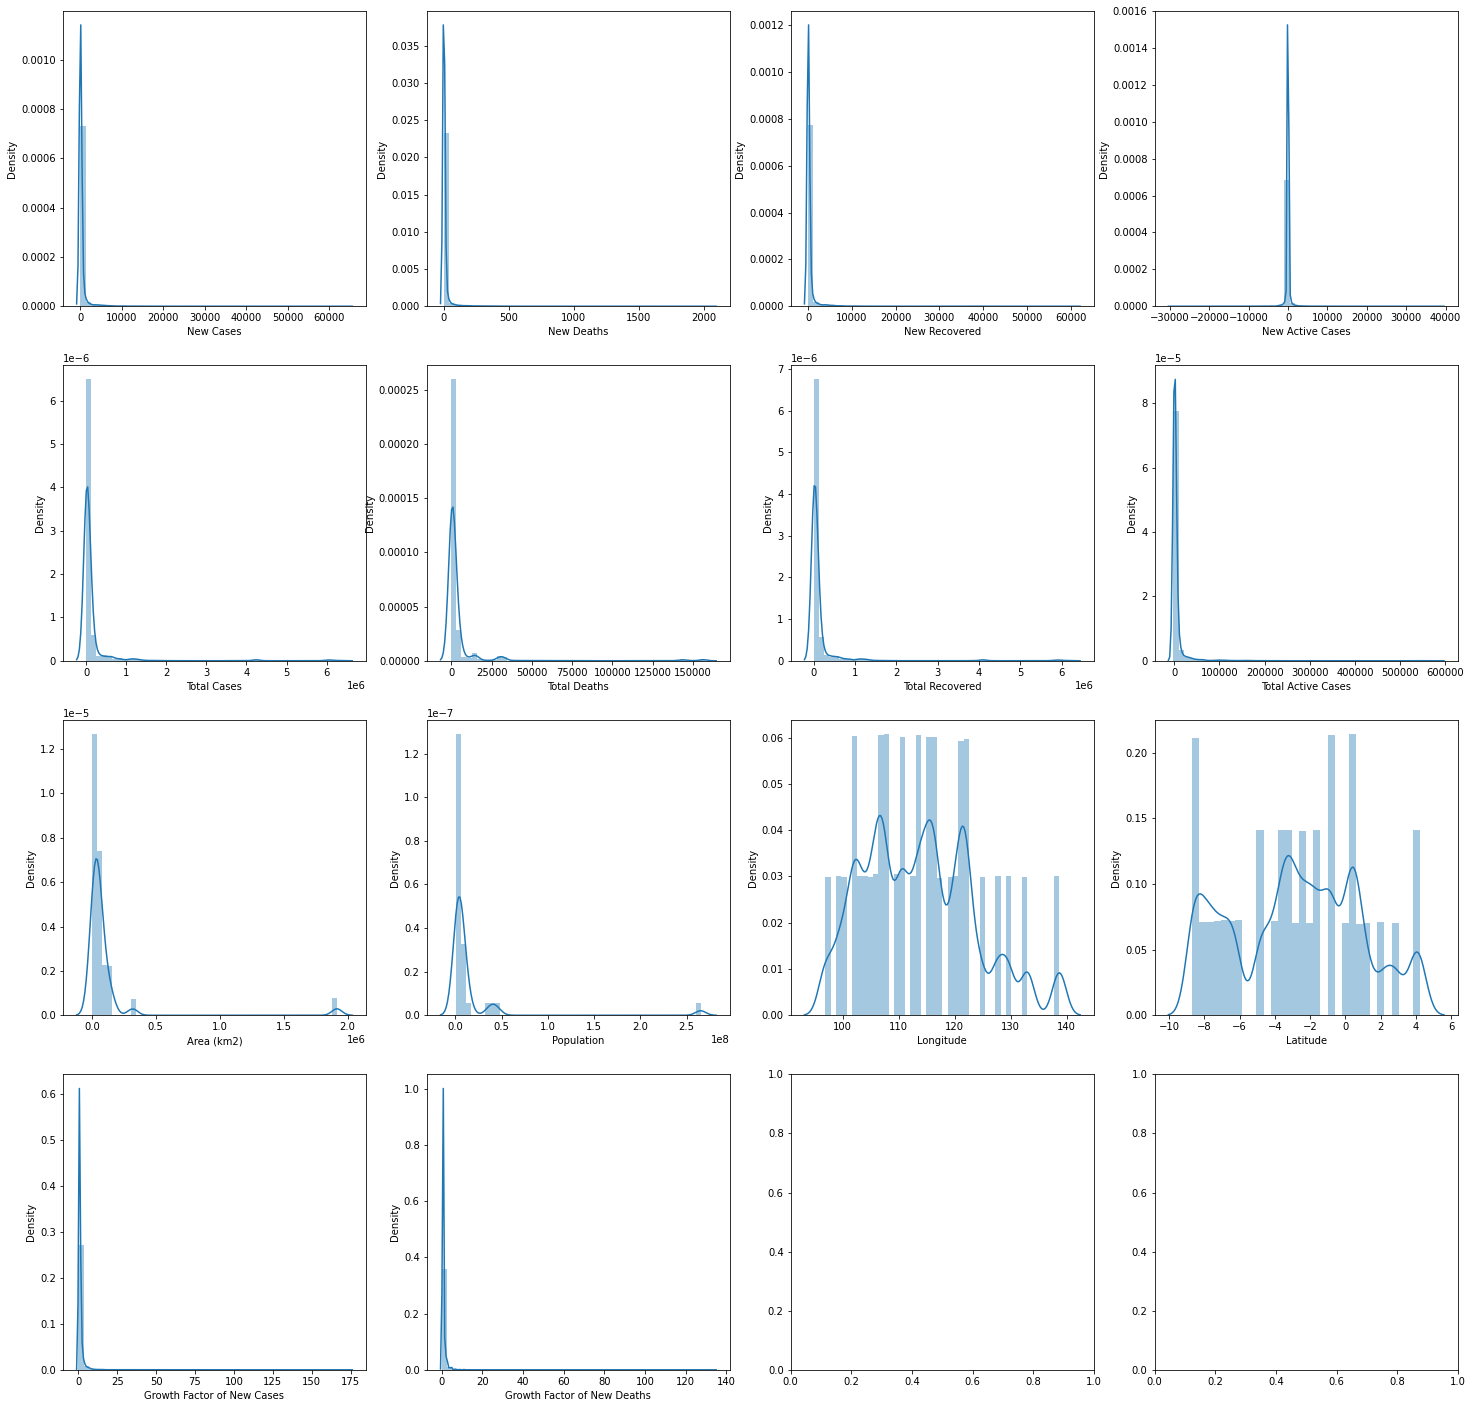

In [6]:
numerical_data = df.corr().index
fig, ax = plt.subplots(4,4, figsize=(25,25))
temp = 0
for j in range(4):
    for i in range(4):
        sns.distplot(df[numerical_data[temp]], ax=ax[j][i]) if temp < 14 else print('')
        temp+=1
plt.show()

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[df.Location == 'Indonesia']
df_filter = df.loc[(df['Date'] >= '2020-03-02') & (df['Date'] <= '4/1/2022')]

#### Data Prepocessing

In [8]:
df_filter.isnull().sum()

Date                             0
Location ISO Code                0
Location                         0
New Cases                        0
New Deaths                       0
New Recovered                    0
New Active Cases                 0
Total Cases                      0
Total Deaths                     0
Total Recovered                  0
Total Active Cases               0
Location Level                   0
Province                       761
Country                          0
Island                         761
Area (km2)                       0
Population                       0
Longitude                        0
Latitude                         0
Case Fatality Rate               0
Case Recovered Rate              0
Growth Factor of New Cases       4
Growth Factor of New Deaths      4
dtype: int64

In [9]:
df_filter.drop('Province', inplace=True, axis=1)
df_filter.drop('Island', inplace=True, axis=1)
df_filter['Growth Factor of New Cases'].fillna(df_filter['Growth Factor of New Cases'].median(), inplace=True)
df_filter['Growth Factor of New Deaths'].fillna(df_filter['Growth Factor of New Deaths'].median(), inplace=True)

In [10]:
df_filter.isnull().sum()

Date                           0
Location ISO Code              0
Location                       0
New Cases                      0
New Deaths                     0
New Recovered                  0
New Active Cases               0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Total Active Cases             0
Location Level                 0
Country                        0
Area (km2)                     0
Population                     0
Longitude                      0
Latitude                       0
Case Fatality Rate             0
Case Recovered Rate            0
Growth Factor of New Cases     0
Growth Factor of New Deaths    0
dtype: int64

In [11]:
df_filter.duplicated().sum()

0

In [12]:
df_filter.shape

(761, 21)

In [13]:
numeric_data = df_filter.select_dtypes(exclude=['object'])
numeric_data.columns

Index(['Date', 'New Cases', 'New Deaths', 'New Recovered', 'New Active Cases',
       'Total Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases',
       'Area (km2)', 'Population', 'Longitude', 'Latitude',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

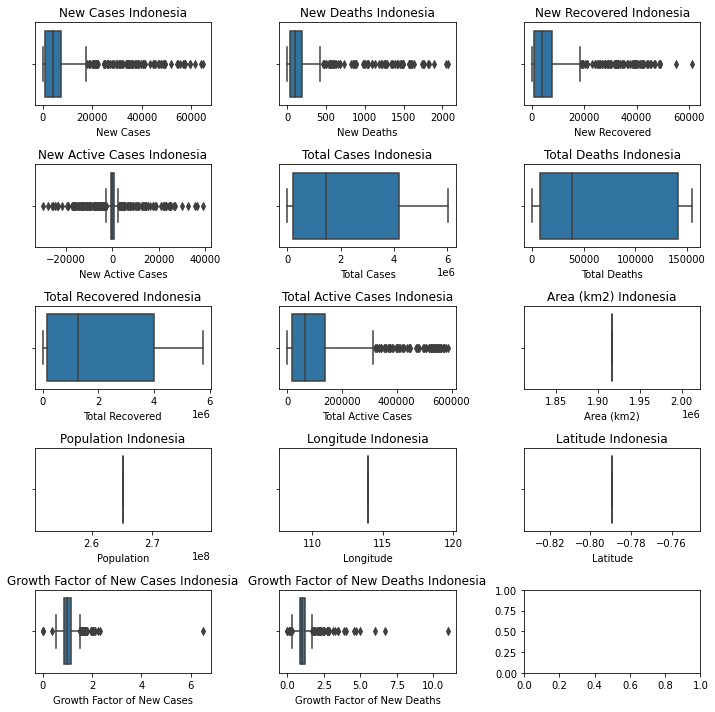

In [14]:
# Cek Outlier dengan Boxplot
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(10,10))

cols = numeric_data.columns.tolist()[1:]
for i, feature in enumerate(cols, 1):    
    # print(i,'+',feature)
    plt.subplot(5, 3, i)
    sns.boxplot(x= feature, data= numeric_data)
    plt.xlabel('{}'.format(feature), size=10, labelpad=5)
    plt.title('{} Indonesia'.format(feature))
    plt.tight_layout()
plt.show()

In [15]:
print(f'Jumlah baris sebelum memfilter outlier: {len(numeric_data)}')

filtered_entries = np.array([True] * len(numeric_data))
for col in numeric_data:
    Q1 = numeric_data[col].quantile(0.25)
    Q3 = numeric_data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((numeric_data[col] >= low_limit) & (numeric_data[col] <= high_limit)) & filtered_entries
    
numeric_data = numeric_data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(numeric_data)}')

Jumlah baris sebelum memfilter outlier: 761
Jumlah baris setelah memfilter outlier: 505


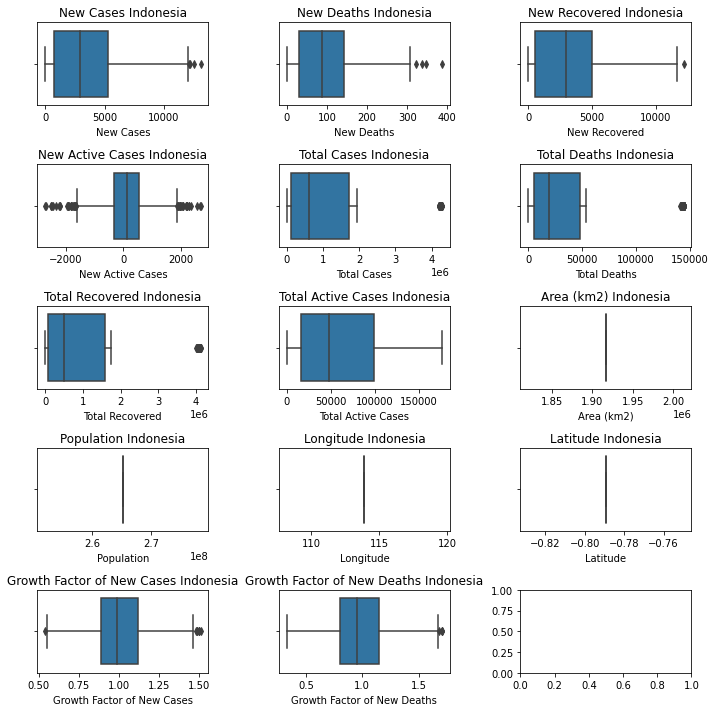

In [16]:
# Cek Outlier dengan Boxplot
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(10,10))

cols = numeric_data.columns.tolist()[1:]
for i, feature in enumerate(cols, 1):    
    plt.subplot(5, 3, i)
    sns.boxplot(x= feature, data= numeric_data)

    plt.xlabel('{}'.format(feature), size=10, labelpad=5)

    plt.title('{} Indonesia'.format(feature))

    plt.tight_layout()

plt.show()

#### Save File

In [17]:
# df_filter.to_csv('result.csv', index=False)

In [18]:
# covid_gdp = pd.merge(covid, gdp, how="outer", on=["DATE"])